# Chapter VIII: Filter design - Finite Impulse Response
## **What are the characteristics to design a filter?**
Filter design is based on magnitude and phase information using FIR and IIR approaches. The coefficientes of causal filters (FIR or IIR) use the required frequency or frequencies of interest.

**Ideal filters**

Ideal filters are not realizable because they are not causal. In case of having an impulse response of infinite duration, the system response must be calculated recursively.

![imagen 1](https://github.com/piero-latorre/DSP/blob/main/VIII/image_0.png?raw=true)



<ipython-input-9-78a47ae4a5e1>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, h, linefmt='b-', markerfmt='bo', basefmt=' ', use_line_collection=True)
<ipython-input-9-78a47ae4a5e1>:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w/np.pi, np.abs(H), linefmt='r-', markerfmt='ro', basefmt=' ', use_line_collection=True)


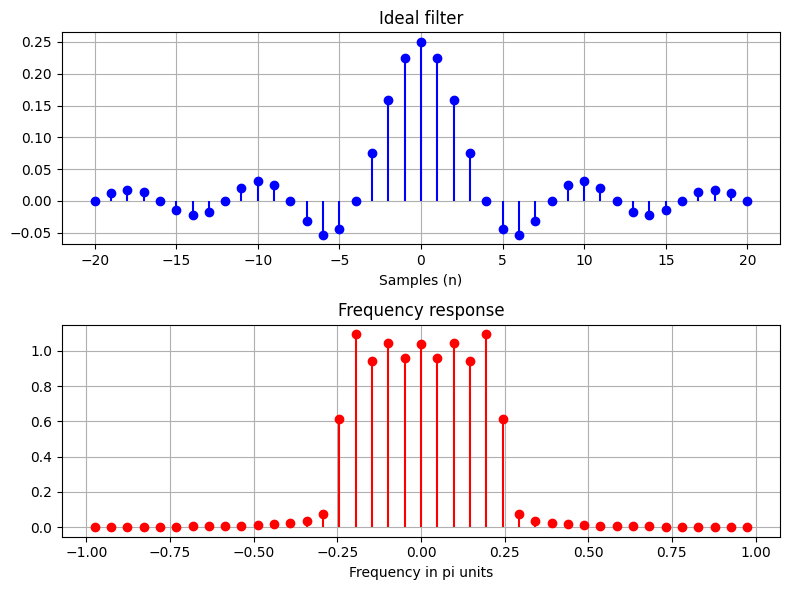

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-20, 21)
h = 0.25 * np.sinc(0.25 * n)
H = np.fft.fftshift(np.fft.fft(h))
w = 2 * np.pi * np.arange(len(H)) / len(H)
w = np.fft.fftshift(w)
w = np.unwrap(w - 2 * np.pi)

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.stem(n, h, linefmt='b-', markerfmt='bo', basefmt=' ', use_line_collection=True)
plt.xlabel('Samples (n)')
plt.title('Ideal filter')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(w/np.pi, np.abs(H), linefmt='r-', markerfmt='ro', basefmt=' ', use_line_collection=True)
plt.xlabel('Frequency in pi units')
plt.title('Frequency response')
plt.grid(True)

plt.tight_layout()
plt.show()


Using LTI based on difference equations:

$$y[n]=-\sum_{k=1}^Na_ky[n-k]+\sum_{k=0}^Mb_kx[n-k]$$
It has to be causal and physically achievable system:

$$H(e^{j\omega})=\frac{\sum_{k=0}^Mb_ke^{-j\omega k}}{1+\sum_{k=1}^Na_ke^{-j\omega k}}$$
Then, the idea is using the LTI system characteristics to our desired frequency response $H_d(e^{j\omega})$ picking their coefficients $a_k$ and $b_k$ .

Using an approximation of desired frequencies, it is possible to obtain an approximation based on a causal system:

* Passband: range of frequencies that does not affect the components of the input signal. The size of the frequency range is the bandwidth. An important clarification is that it is not necessary that the magnitude of the filter in the passband has to be constant. Normally, a ripple can be tolerated

$𝛿_1$: ripple of the passband

$\omega_p$: pass frequency

* Stopband: range of frequencies that does not allow the signal to pass. As well as the passband, a ripple can be considered for the design.

$𝛿_2$: ripple of the stopband

$\omega_s$: stop frequency

* Transition band: range of frequencies between the pass and the stop band.

**Example**

Design a low-pass filter with a passband of $[0,\omega_p]$ and the stopband of $[\omega_s,\pi]$

* It can be concluded that the transitin band is between $[\omega_p,\omega_s]$ with a bandwidth of $\omega_s-\omega_p$ 

* Usually, the dynamic range of the filter is represented by using logarithmic scale: $20log_{10}(|H(e^{j\omega})|)$.

Then, it can be observed that the classic specifications for filter design are:

* Ripple of the passband: $\delta_1$

* Ripple of the stopband: $\delta_2$

* Passband: $\omega_p$

* Stopband: $\omega_s$ 

Following that, it is possible to obtain $a_k$, $b_k$ which are the coefficients capable to generate an approximate filter close to the desired frequency response $H_d(e^{j\omega})$.

![imagen2](https://github.com/piero-latorre/DSP/blob/main/VIII/image_1.png?raw=true)

##**How can we design a FIR filter?**

The FIR filter can be expressed as the following difference equation:

$$y[n]=\sum_{k=0}^{M-1} b_kx[n-k]$$
*  $b_k=h[k]$ is the impulse response of the system

* Given the finite coefficients: $h[0],h[1],...,h[M-1]$ its response can be calculated from the sum of the convolution.

* The frequency response can be expressed as:

$$H(z)=\sum_{k=0}^{M-1}h[k]z^{-k}$$
Then, the FIR filter design is based on finding the M coefficients of $h[n]$ from the desired filter characteristics.

In this course we will study two methods:

* Window method

* Frequency sampling method

##**What is the procedure for the window method?**

Suppose we have

$$H_d(e^{j\omega})=\sum_{n=-\infty}^\infty h_d[n]e^{-j\omega n}$$
Where $H_d$ is the response of the desired filter, $h_d[n]$ is a sequence with infinite duration and has to be limited to $M$ coefficients.

Then, an initial approximation is to multiply $h_d$ by a rectangular window.

$$\omega [n]=\begin{cases} 1,\quad n=0,1,\dots,M \\ 0,\quad \text{otherwise} \end{cases}$$
Window effect: the product on the discrete-time means a convolution in frequency. Hence, $H(e^{j\omega})$ is a distortioned version of $H_d(e^{j\omega})$.

![imagen3](https://github.com/piero-latorre/DSP/blob/main/VIII/image_2.png?raw=true)

Figure 3. (a) Convolution process implied by truncation of the ideal impulse response. (b) Typical approximation resulting from windowing the ideal impulse response.

**Example:**

Using the rectangular window:

$$W(e^{j\omega})=\sum_{n=0}^Me^{-j\omega n} = \frac{1-e^{-j\omega(M+1)}}{1-e^{-j\omega}} = e^{-j\omega\frac{M}{2}}\frac{\sin \left(\frac{\omega(M+1)}{2}\right)}{\sin\left(\frac{\omega}{2}\right)}$$
Magnitude spectrum:

$$W(e^{j\omega})=\frac{\left|\sin\left(\frac{\omega(M+1)}{2}\right)\right|}{\left|\sin\left(\frac{\omega}{2}\right)\right|},\quad -\pi\leq\omega\leq\pi$$


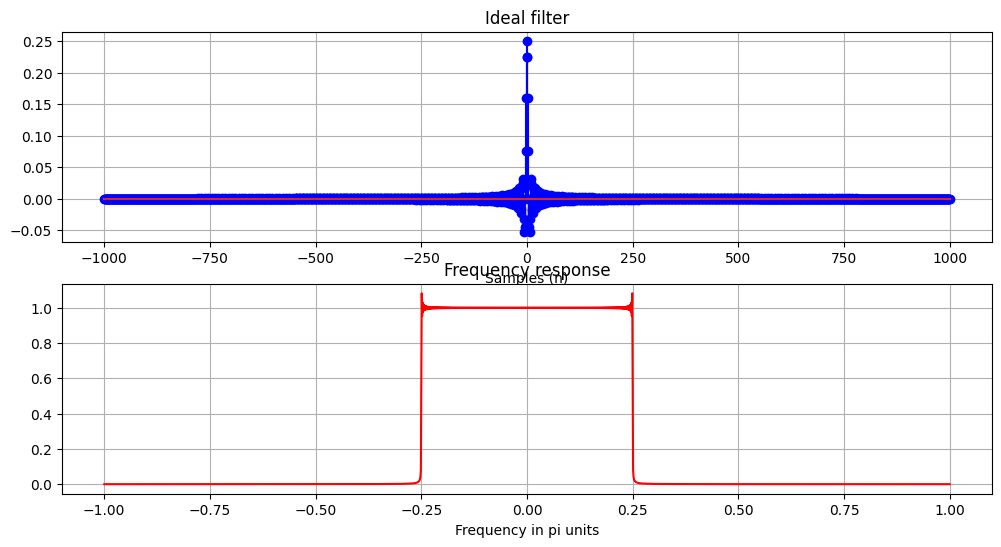

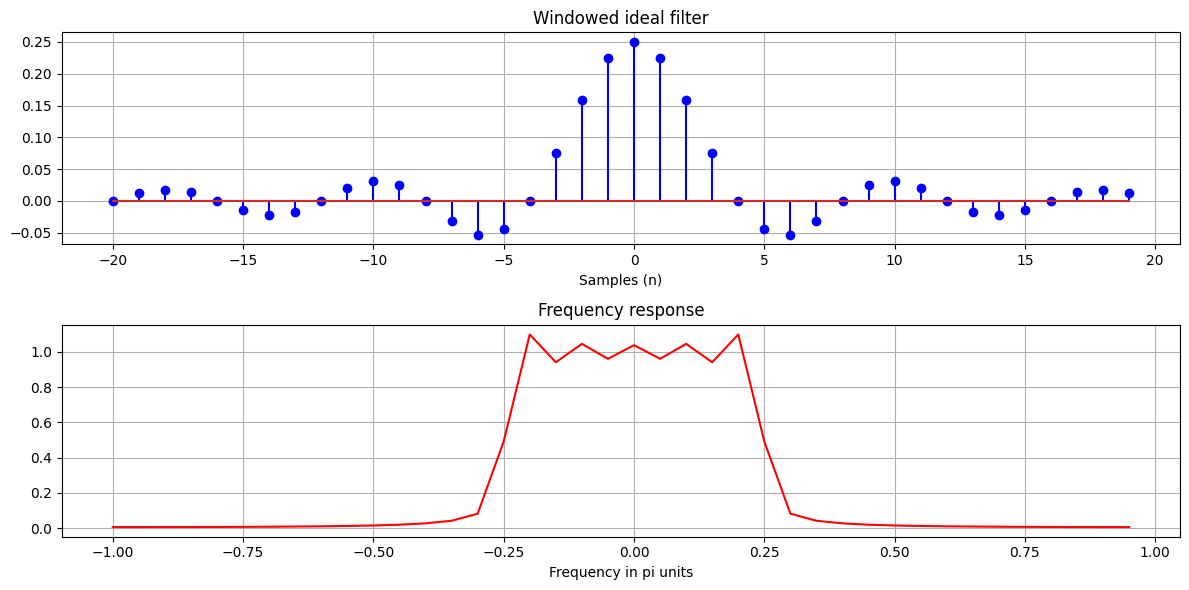

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Show the frequency response of an ideal filter (consider infinite duration as 2000 samples) and for its windowed version
n = np.arange(-1000, 1001)
h = 0.25 * np.sinc(0.25 * n)
H = np.fft.fftshift(np.fft.fft(h))
w = 2 * np.pi * np.arange(len(H)) / len(H)
w = np.fft.fftshift(w)
w = np.unwrap(w - 2 * np.pi)
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.stem(n, h, "b")
plt.xlabel("Samples (n)")
plt.title("Ideal filter")
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.abs(H), "r")
plt.xlabel("Frequency in pi units")
plt.title("Frequency response")
plt.grid(True)


n = np.arange(-20, 20)
h = 0.25 * np.sinc(0.25 * n)
H = np.fft.fftshift(np.fft.fft(h))
w = 2 * np.pi * np.arange(len(H)) / len(H)
w = np.fft.fftshift(w)
w = np.unwrap(w - 2 * np.pi)
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.stem(n, h, "b")
plt.xlabel("Samples (n)")
plt.title("Windowed ideal filter")
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.abs(H), "r")
plt.xlabel("Frequency in pi units")
plt.title("Frequency response")
plt.grid(True)

plt.tight_layout()


![image4](https://github.com/piero-latorre/DSP/blob/main/VIII/image_3.png?raw=true)

Figure 4. Magnitude of the Fourier transform of a rectangular window

From Figure 4 note that:

* If $M$ increment its value, the principal lobe decrements its value. However, this imply an increment of the secondary lobes.

* The main lobe width is the distance between nearest zero-crossings on both sides or transition bandwidth.

* The effect of the lateral lobes is called ringing effect. In addition, the width of the principal lobe generates a soft effect on the boundaries of the filter.

* These effects are counteracted by using different types of windows.

**Rectangular**

$$w[n]=\begin{cases}1,\quad0\leq n\leq M \\ 0,\quad \text{otherwise}\end{cases}$$


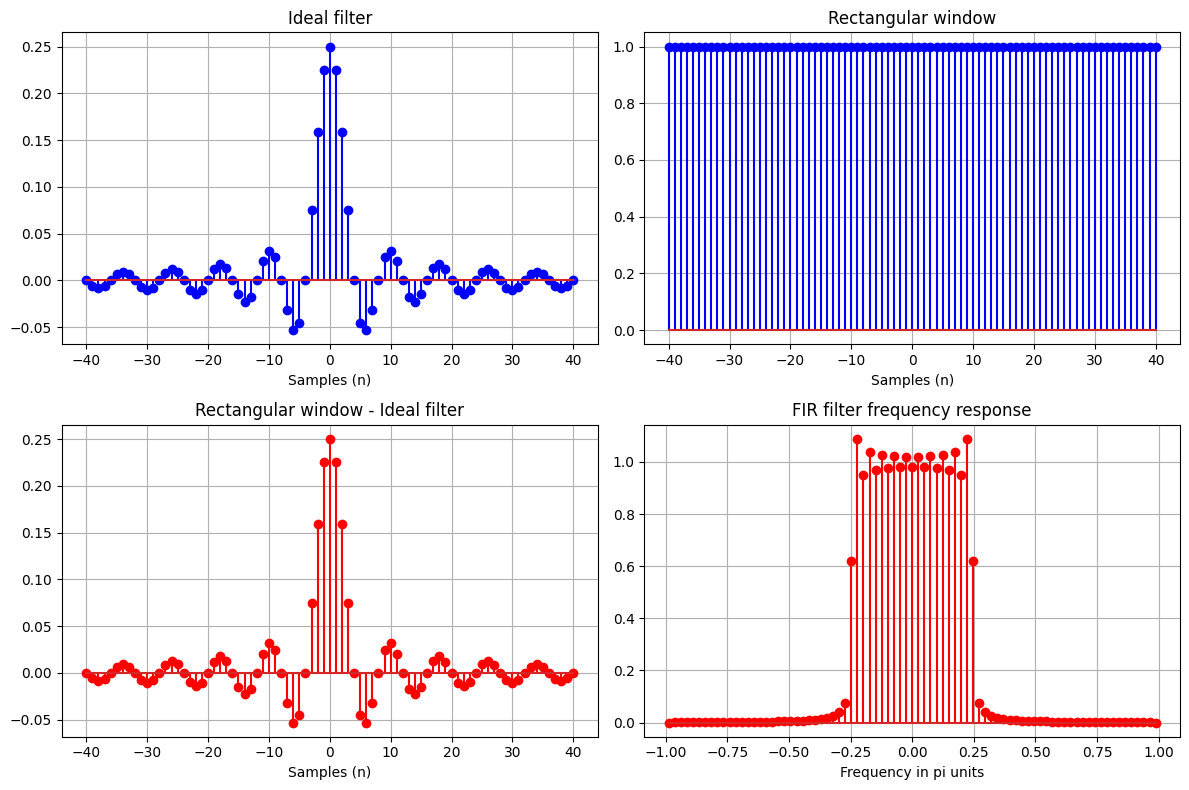

In [11]:
# Define the ideal filter
import scipy.signal as sig
n = np.arange(-40, 41)
h = 0.25*np.sinc(0.25*n)

# Apply rectangular window
wind = sig.windows.boxcar(81)
h_new = h*wind#np.outer(h,wind)
# print(h_new)
# Compute frequency response of the FIR filter
H = np.fft.fftshift(np.fft.fft(h_new))
w = np.fft.fftshift(2*np.pi*np.arange(len(H))/len(H))
w = np.unwrap(w - 2*np.pi)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.stem(n, h, 'b')
plt.xlabel('Samples (n)')
plt.title('Ideal filter')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(n, wind, 'b')
plt.xlabel('Samples (n)')
plt.title('Rectangular window')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.stem(n, h_new, 'r')
plt.xlabel('Samples (n)')
plt.title('Rectangular window - Ideal filter')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(w/np.pi, abs(H), 'r')
plt.xlabel('Frequency in pi units')
plt.title('FIR filter frequency response')
plt.grid(True)

# plt.tight()
plt.tight_layout()


**Bartlett (triangular)**

$$w[n]=\begin{cases} 2n/M,\quad 0\leq n\leq M/2 \\ 2-2n/M,\quad M/2<n\leq M\\ 0,\quad \text{otherwise} \end{cases}$$


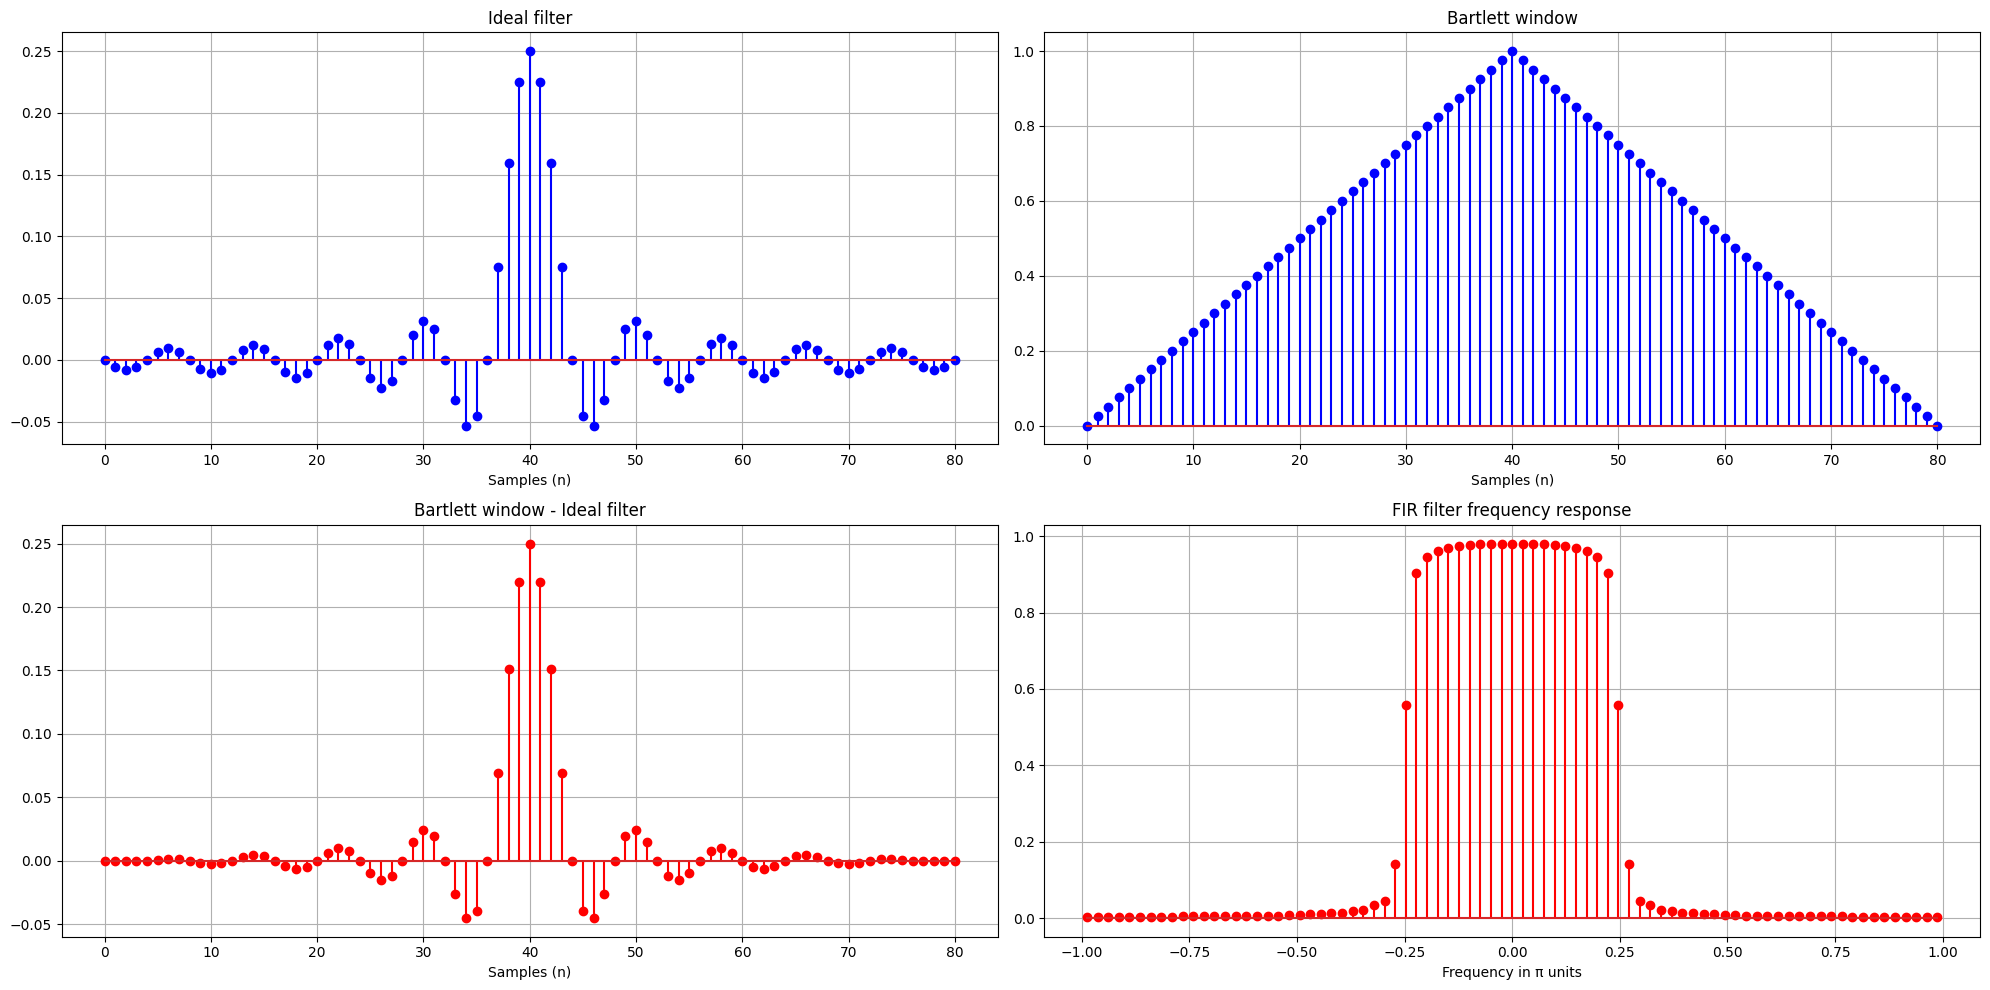

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-40, 41)
h = 0.25 * np.sinc(0.25 * n)
n = np.arange(len(h))
wind = np.bartlett(81)
h_new = h * wind
H = np.fft.fftshift(np.fft.fft(h_new))
w = 2 * np.pi * np.arange(len(H)) / len(H)
w = np.fft.fftshift(w)
w = np.unwrap(w - 2 * np.pi)

plt.figure(5)
plt.figure(5).set_size_inches(20, 10)

plt.subplot(2, 2, 1)
plt.stem(n, h, "b")
plt.xlabel("Samples (n)")
plt.title("Ideal filter")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(n, wind, "b")
plt.xlabel("Samples (n)")
plt.title("Bartlett window")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.stem(n, h_new, "r")
plt.xlabel("Samples (n)")
plt.title("Bartlett window - Ideal filter")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(w / np.pi, np.abs(H), "r")
plt.xlabel("Frequency in π units")
plt.title("FIR filter frequency response")
plt.grid(True)

plt.tight_layout()


**Hanning**

$$w[n]=\begin{cases}0.5-0.5\cos (2\pi n/M),\quad 0 \leq n \leq M \\ 0,\quad \text{otherwise}\end{cases}$$


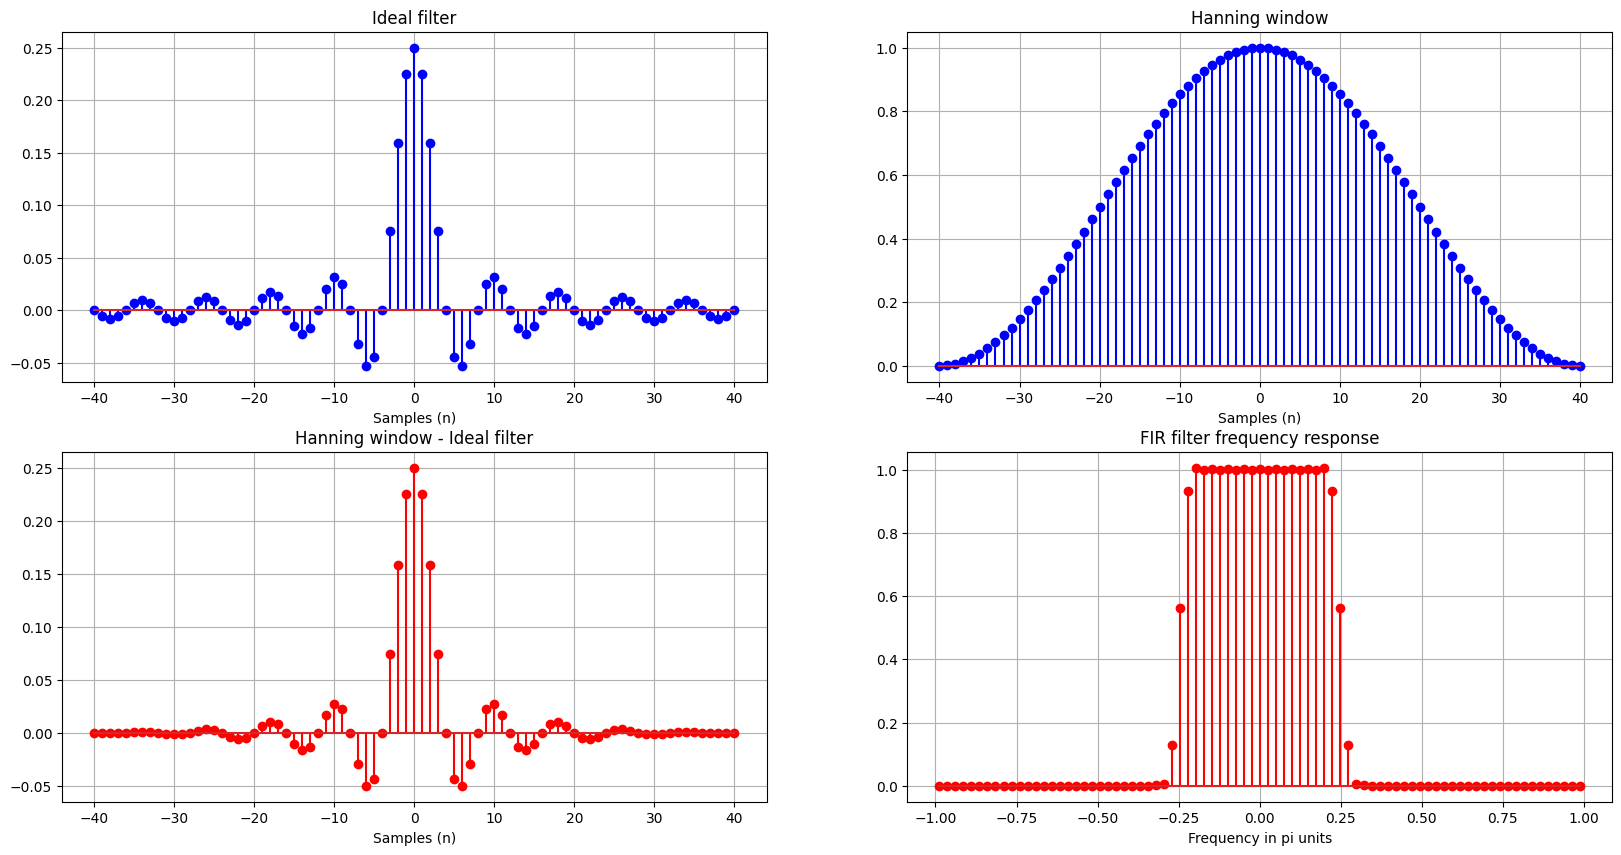

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Apply Hanning window of M = 81 to an ideal filter
n = np.arange(-40, 41)
h = 0.25 * np.sinc(0.25 * n)
wind = np.hanning(81)
h_new = h * wind
H = np.fft.fftshift(np.fft.fft(h_new))
w = np.fft.fftshift(2 * np.pi * np.arange(len(H)) / len(H))
w = np.unwrap(w - 2 * np.pi)
plt.figure(6, figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.stem(n, h, "b")
plt.xlabel("Samples (n)")
plt.title("Ideal filter")
plt.grid(True)
plt.subplot(2, 2, 2)
plt.stem(n, wind, "b")
plt.xlabel("Samples (n)")
plt.title("Hanning window")
plt.grid(True)
plt.subplot(2, 2, 3)
plt.stem(n, h_new, "r")
plt.xlabel("Samples (n)")
plt.title("Hanning window - Ideal filter")
plt.grid(True)
plt.subplot(2, 2, 4)
plt.stem(w / np.pi, np.abs(H), "r")
plt.xlabel("Frequency in pi units")
plt.title("FIR filter frequency response")
plt.grid(True)
plt.show()


**Hamming**

$$w[n]=\begin{cases}0.54-0.46\cos(2\pi n/M),\quad 0\leq n \leq M \\ 0,\quad \text{otherwise}\end{cases}$$


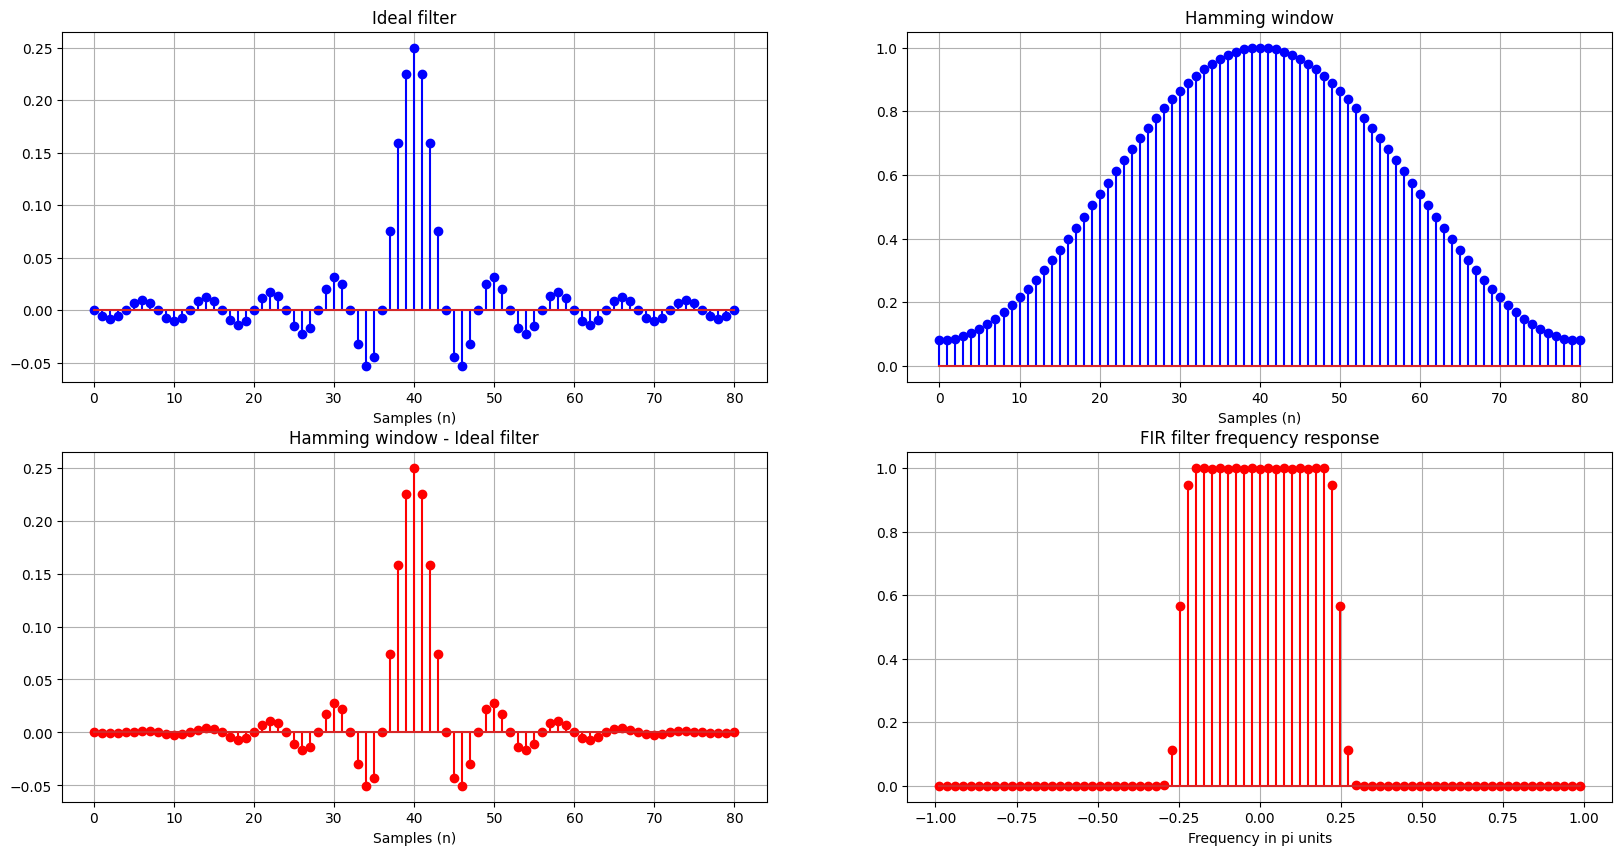

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-40, 41)
h = 0.25*np.sinc(0.25*n)
n = np.arange(len(h))
wind = np.hamming(81)
h_new = h*wind
H = np.fft.fftshift(np.fft.fft(h_new))
w = np.fft.fftshift(2*np.pi*np.arange(len(H))/len(H))
w = np.unwrap(w - 2*np.pi)
fig = plt.figure(7, figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.stem(n, h, 'b')
plt.xlabel('Samples (n)')
plt.title('Ideal filter')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.stem(n, wind, 'b')
plt.xlabel('Samples (n)')
plt.title('Hamming window')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.stem(n, h_new, 'r')
plt.xlabel('Samples (n)')
plt.title('Hamming window - Ideal filter')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.stem(w/np.pi, np.abs(H), 'r')
plt.xlabel('Frequency in pi units')
plt.title('FIR filter frequency response')
plt.grid(True)
plt.show()


![imagen5](https://github.com/piero-latorre/DSP/blob/main/VIII/image_4.png?raw=true)

Figure 5. Commonly used windows

![imagen6](https://github.com/piero-latorre/DSP/blob/main/VIII/image_5.png?raw=true)

Figure 6. Fourier transforms of windows (M=50).

![imagen7](https://github.com/piero-latorre/DSP/blob/main/VIII/image_6.png?raw=true)

Figure 7. Design parameters for FIR filter using Window method.

**Example**

Design a low-pass digital filter using the window method:

$$H_1(e^{j\omega})=\begin{cases} 0.95\leq H(e^{j\omega})\leq 1.05,\quad 0 \leq |\omega|\leq 0.25\pi \\ -0.1\leq H(e^{j\omega}) \leq 0.1,\quad 0.35\pi \leq |\omega| \leq \pi \end{cases}$$
Propose the most appropriate window and find the order for your selection.



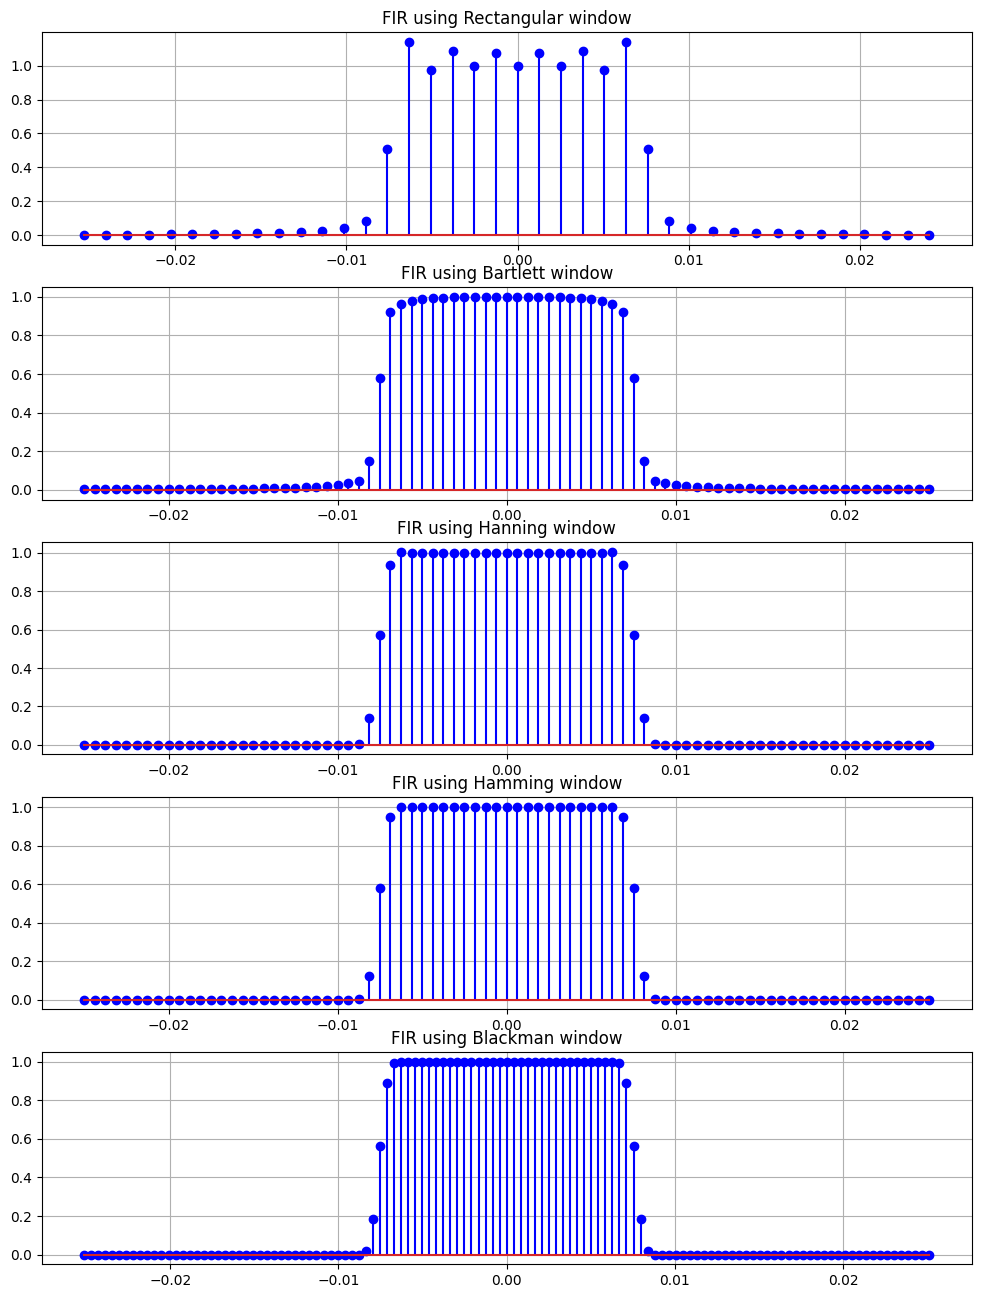

In [15]:
from scipy.signal import firwin
from numpy.fft import fft, fftshift, fftfreq

d1 = -20*np.log10(1/(1-0.05))
d2 = 20*np.log10(0.1)
wp = 0.25
ws = 0.35
dw = ws-wp
M_rect = int(np.floor((4/dw)-1))
M_bart = int(np.floor(8/dw))
M_hann = int(np.floor(8/dw))
M_hamm = int(np.floor(8/dw))
M_blac = int(np.floor(12/dw))
wc = 0.3
h_rect = firwin(M_rect+1, wc, window='rectangular')
h_bart = firwin(M_bart+1, wc, window='bartlett')
h_hann = firwin(M_hann+1, wc, window='hann')
h_hamm = firwin(M_hamm+1, wc, window='hamming')
h_blac = firwin(M_blac+1, wc, window='blackman')
H_rect = fftshift(fft(h_rect))
H_bart = fftshift(fft(h_bart))
H_hann = fftshift(fft(h_hann))
H_hamm = fftshift(fft(h_hamm))
H_blac = fftshift(fft(h_blac))
w_rect = fftshift(fftfreq(len(H_rect))/2/np.pi)
w_bart = fftshift(fftfreq(len(H_bart))/2/np.pi)
w_hann = fftshift(fftfreq(len(H_hann))/2/np.pi)
w_hamm = fftshift(fftfreq(len(H_hamm))/2/np.pi)
w_blac = fftshift(fftfreq(len(H_blac))/2/np.pi)

plt.figure(figsize=(12,16))
plt.subplot(5, 1, 1); plt.stem(w_rect/np.pi, abs(H_rect), "b"); plt.title("FIR using Rectangular window"); plt.grid(True)
plt.subplot(5, 1, 2); plt.stem(w_bart/np.pi, abs(H_bart), "b"); plt.title("FIR using Bartlett window"); plt.grid(True)
plt.subplot(5, 1, 3); plt.stem(w_hann/np.pi, abs(H_hann), "b"); plt.title("FIR using Hanning window"); plt.grid(True)
plt.subplot(5, 1, 4); plt.stem(w_hamm/np.pi, abs(H_hamm), "b"); plt.title("FIR using Hamming window"); plt.grid(True)
plt.subplot(5, 1, 5); plt.stem(w_blac/np.pi, abs(H_blac), "b"); plt.title("FIR using Blackman window"); plt.grid(True)


##**What is the procedure for the frequency sampling method?**

Specify the desired frequency response on a set of frequency uniformly spaced.

$$\omega_k=\frac{2\pi}{M}(k+\alpha)$$
if $M$ is odd: $k=0,1,...,\frac{M-1}{2}$

if $M$ is even: $k=0,1,...,\frac{M}{2}-1$

$\alpha=0$ or $\frac{1}{2}$

From that specification, it is possible to find $h[n]$ using the following equation:

$$H(e^{j\omega})=\sum_{n=0}^{M-1}h[n]e^{-j\omega n}$$
$$H(k+\alpha)=\sum_{n=0}^{M-1}h[n]e^{-j\frac{2\pi(k+\alpha)n}{M}},\quad k=0,1,\dots,M-1$$
If we calculated the inverse of $H(k+\alpha)$:

$$h[n] = \frac{1}{M}\sum_{k=0}^{M-1}H(k+\alpha) e^{j\frac{2\pi(k+\alpha)n}{M}},\quad n = 0,1,\dots,M-1$$
If $\alpha=0$, both equations can be reduced to DFT and IDFT, respectively. given a real $h[n]$, $H[k+\alpha]$ satisfy:

$$H[k+\alpha]=H^*[M-k-\alpha]$$
This symmetry property allows the reduction to $\frac{M+1}{2}$ samples if $M$ is odd and $\frac{M}{2}$ samples if $M$ is even.

**Example**

Design a low-pass filter using the frequency sampling method considering $H_d(e^{j\omega})$ as an ideal filter, $M=10$ and $\alpha=0$.

$$H_d(e^{j\omega})=\begin{cases} 1,\quad |\omega|\leq \frac{\pi}{2} \\ 0,\quad \text{other} \end{cases}$$
Find the impulse response



[0.  0.2 0.4 0.6 0.8 1. ]
[1 1 1 0 0 0]


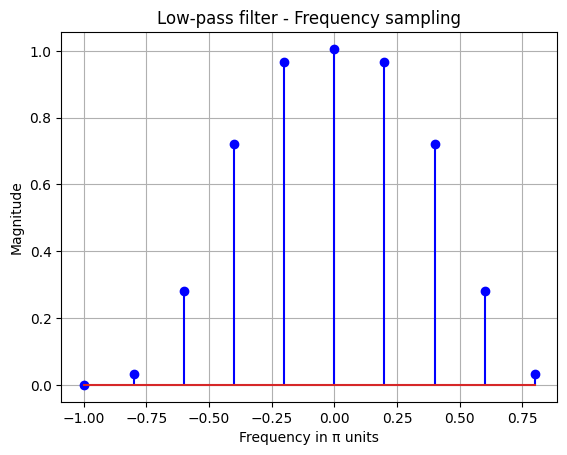

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal  import firwin2
M = 10
k = np.arange(0, M/2+1)
wk = 2 * k / M
a = np.array(wk < 0.5, dtype=int)
print(wk)
print(a)
# h = np.fft.ifftshift(np.fft.ifft(np.fft.fftshift(a)))
h = firwin2(M,wk,a)
H = np.fft.fftshift(np.fft.fft(h))
w = np.unwrap(np.fft.fftshift(2 * np.pi * np.arange(len(H)) / len(H)) - 2 * np.pi)

plt.stem(w/np.pi, np.abs(H), 'b')
plt.xlabel('Frequency in π units')
plt.ylabel('Magnitude')
plt.title('Low-pass filter - Frequency sampling')
plt.grid(True)
plt.show()

